<a href="https://colab.research.google.com/github/choeuneheol/python-practice/blob/master/%EB%AC%B8%EC%A0%9C%ED%95%B4%EA%B2%B0%EC%B1%85DAY3(%EC%9E%90%EC%A0%84%EA%B1%B0%EC%88%98%EC%9A%94%EC%98%88%EC%B8%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd # 판다스 임포트

train = pd.read_csv('train.csv') # 훈련 데이터
test = pd.read_csv('test.csv') # 테스트 데이터
submission = pd.read_csv('sampleSubmission.csv') # 제출 샘플 데이터

In [ ]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# datetime - 기록일시(1시간 간격)
# season - 계절(1 :봄, 2:여름, 3:가을, 4:겨울)
# holiday - 공휴일 여부 (0:공휴일 아님, 1:공휴일)
# workingday - 근무일 여부 (0: 근무일 아님, 1:근무일) 주말과 공휴일이 아니면 근무일이라고 간주
# weather - 날씨(1: 맑음, 2: 옅은 안개,약간흐림, 3: 약간의눈, 약간의 비와 천둥 번개 ,흐림,
# 4: 폭우와 천둥 번개, 눈과 짙은 안개) 숫자가 클수록 날씨가 안 좋음
# temp - 실제온도
# atemp - 체감온도
# humidity - 상대 습도
# windspeed - 풍속
# casual - 등록되지 않은 사용자(비회원) 수
# registered - 등록된 사용자(회원)수
# count - 자전거 대여 수량

In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


##더 효과적인 분석을 위한 피처 엔지니어링

In [ ]:
print(train['datetime'][100])#datetime 100번째 원소
print(train['datetime'][100].split())# 공백 기준으로 문자열 나누기
print(train['datetime'][100].split()[0])#날짜
print(train['datetime'][100].split()[1])#시간

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [ ]:
print(train['datetime'][100].split()[0]) # 날짜
print(train['datetime'][100].split()[0].split("-"))# "-"기준으로 문자열 나누기
print(train['datetime'][100].split()[0].split("-")[0])#연도
print(train['datetime'][100].split()[0].split("-")[1])#월
print(train['datetime'][100].split()[0].split("-")[2])#일

2011-01-05
['2011', '01', '05']
2011
01
05


In [ ]:
print(train['datetime'][100].split()[1])#시간
print(train['datetime'][100].split()[1].split(":"))# ":" 기준으로 문자열 나누기
print(train['datetime'][100].split()[1].split(":")[0])#시간
print(train['datetime'][100].split()[1].split(":")[1])#분
print(train['datetime'][100].split()[1].split(":")[2])#초

09:00:00
['09', '00', '00']
09
00
00


In [ ]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0]) #날짜 피처 생성

# 연도, 월, 일, 시, 분, 초, 피처를 차례로 생성
train['year'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[2])

In [ ]:
# 위의 대한 설명

# train['year] =   <= 3) 'year'피처로 추가합니다.
# train['datetime']   <= 1) train의 'datetime' 피처의 원소 각각에
# apply <= 2) 람다 함수를 적용하여
# x: x.split()[0] <= 1. 공백으로 나눈후 0번째 요소를
# split('-')[0]) <= 2. 다시 '-'로 나눈 후 0번째 요소를 취합니다.

In [ ]:
from datetime import datetime # datetime 라이브러리 임포츠
import calendar

print(train['date'][100]) # 날짜
print(datetime.strptime(train['date'][100], '%Y-%m-%d')) # datetime 타입으로 변경
# 정수로 요일 반환
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday())
# 문자열로 요일 반환
print(calendar.day_name[datetime.strptime(train['date'][100],'%Y-%m-%d').weekday()])

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [ ]:
train['weekday'] = train['date'].apply(
    lambda dateString:
    calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])

In [ ]:
train['season'] = train['season'].map({ 1: 'Spring',
                                        2: 'Summer',
                                        3: 'Fall',
                                        4: 'Winter'})
train['weather'] = train['weather'].map({1: 'Clear',
                                         2: 'Mist, Few clouds',
                                         3: 'Light Snow, Rain, Thunderstorm',
                                         4: 'Heavy Rain, Thunderstorm, Snow, Fog'})

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


In [ ]:
# date, year, month, day, hour, minute, second, weekday 피처가 추가가 됐고,
# season과 weather피처는 숫자에서 문자로 바뀌었다.

##데이터 시각화

In [ ]:
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
#분포도
mpl.rc('font', size=15)       #폰트 크기를 15로 설정
sns.displot(train['count']);  #분포도 출력


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


In [ ]:
sns.displot(np.log(train['count']));

### 스텝1 : m행 n열 Figure 준비하기

In [83]:
#스텝 1 : m행 n열 figure 준비
mpl.rc('font',size=14)                            # 폰트 크기 설정
mpl.rc('axes', titlesize=15)                      # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2)     # 3행 2열 Figure 생성 
plt.tight_layout()                                # 그래프 사이에 여백 확보
figure.set_size_inches(10,9)                      # 전체 Figure 크기를 10*9인치로 설정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


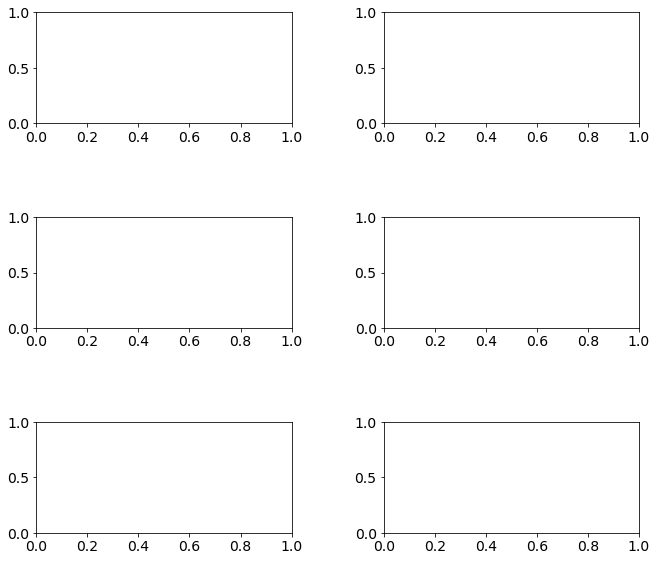

In [84]:
figure

In [85]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47397f1d10>,
      dtype=object)

In [86]:
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


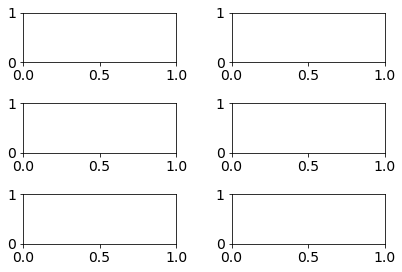

In [87]:
figure

### 스텝2 : 각 축에 서브플롯 할당

In [88]:
#스텝 2 : 각 축에 서브플롯 할당
#각 축에 연도, 월, 일, 시간, 분, 초별 평균 대여 수량 막대 그래프 할당
sns.barplot(x='year', y='count', data=train, ax=axes[0,0])
sns.barplot(x='month', y='count', data=train, ax=axes[0,1])
sns.barplot(x='day', y='count', data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1,1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2,0])
sns.barplot(x='second', y='count', data=train, ax=axes[2,1])

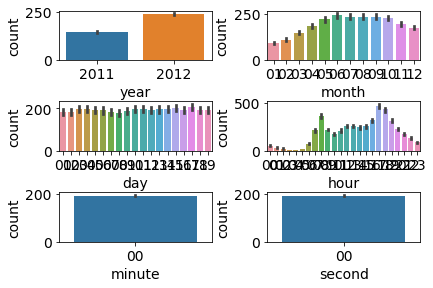

In [89]:
figure

###스텝3 : (선택) 세부설정

In [90]:
#3-1 : 서브플롯에 제목 달기
axes[0,0].set(title='Rental amounts by year')
axes[0,1].set(title='Rental amounts by month')
axes[1,0].set(title='Rental amounts by day')
axes[1,1].set(title='Rental amounts by hour')
axes[2,0].set(title='Rental amounts by minute')
axes[2,1].set(title='Rental amounts by second')

[Text(0.5, 1.0, 'Rental amounts by second')]

In [75]:
#3-2 : 1행에 위치한 서브플롯들의 x축 라벨 90도 회전
axes[1,0].tick_params(axis='x', labelrotation=90)
axes[1,1].tick_params(axis='x', labelrotation=90)

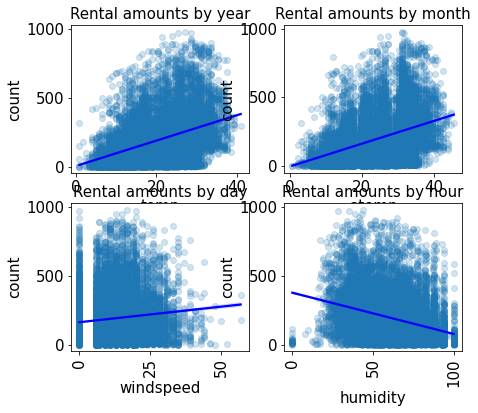

In [76]:
figure

##박스플롯

In [ ]:
#스텝 1 : m행 n열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(10,10)

#스텝 2 : 서브플롯 할당
#계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count',data=train, ax=axes[0,0])
sns.boxplot(x='weather', y='count',data=train, ax=axes[0,1])
sns.boxplot(x='holiday', y='count',data=train, ax=axes[1,0])
sns.boxplot(x='workingday', y='count',data=train, ax=axes[1,1])

# 스텝 3 : 세부 설정
# 3-1 : 서브 플롯에 제목달기
axes[0,0].set(title='Box Plot On Count Across Season')
axes[0,1].set(title='Box Plot On Count Across Weather')
axes[1,0].set(title='Box Plot On Count Across Holiday')
axes[1,1].set(title='Box Plot On Count Across Working Day')

# 3-2 : x축 라벨 겹침 해결
axes[0,1].tick_params(axis='x',labelrotation=10) #10도 회전

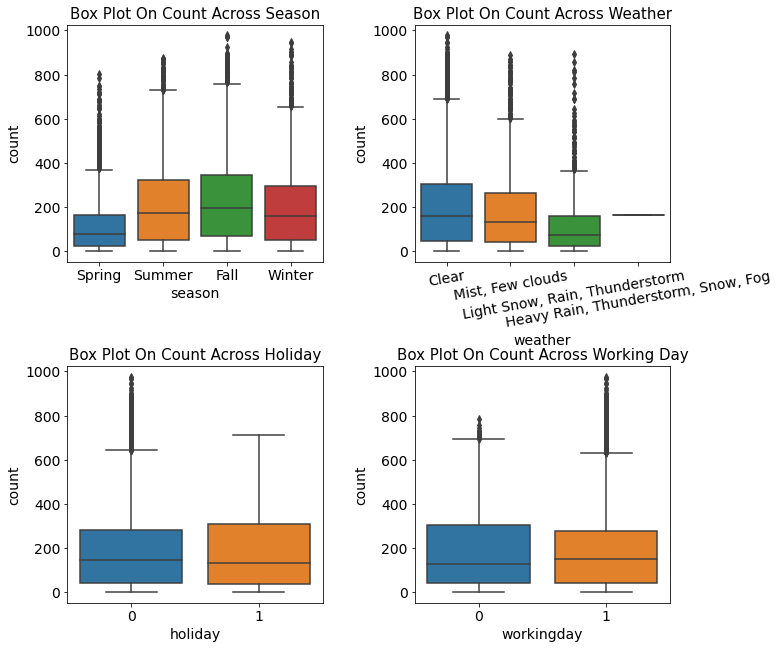

In [ ]:
figure

In [ ]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f473c445190>,
      dtype=object)

###포인트플롯

In [91]:
# 스텝 1 : m행 n열 figure 준비
mpl.rc('font',size=11)
figure, axes = plt.subplots(nrows=5) # 5행 1열
figure.set_size_inches(12,18)

# 스텝 2 : 서브플롯 할당
# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트 플롯
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4]);


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


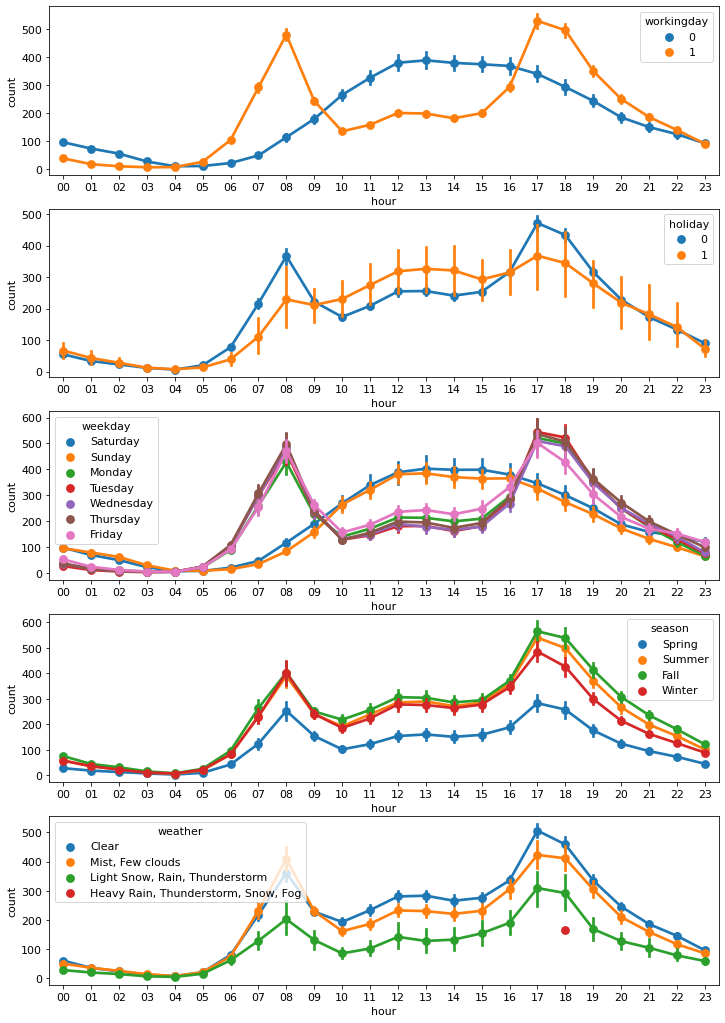

In [92]:
figure

### 회귀선을 포함한 산점도 그래프

In [93]:
# 스텝 1 : m행 n열 figure 준비
mpl.rc('font',size=15)
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
figure.set_size_inches(7,6)

# 스텝 2 : 서브플롯 할당
# 온도, 체감 온도, 풍속, 습도, 별 대여 수량 산점도 그래프
sns.regplot(x='temp',y='count', data=train, ax=axes[0,0],
            scatter_kws={'alpha':0.2},line_kws={'color':'blue'})
sns.regplot(x='atemp',y='count', data=train, ax=axes[0,1],
            scatter_kws={'alpha':0.2},line_kws={'color':'blue'})
sns.regplot(x='windspeed',y='count', data=train, ax=axes[1,0],
            scatter_kws={'alpha':0.2},line_kws={'color':'blue'})
sns.regplot(x='humidity',y='count', data=train, ax=axes[1,1],
            scatter_kws={'alpha':0.2},line_kws={'color':'blue'});

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


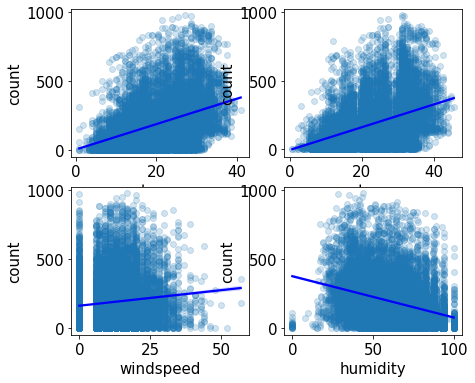

In [94]:
figure

### 히트맵

In [ ]:
train[['temp','atemp','humidity','windspeed','count']].corr()
#수치형 데이터 간 상관관계 매트릭스

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


In [ ]:
# 피처 간 상관관계 매트릭스
corrMat = train[['temp','atemp','humidity','windspeed','count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMat, annot=True) # 상관관계 히트맵 그리기
ax.set(title ='heatmap of Numerical Data');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


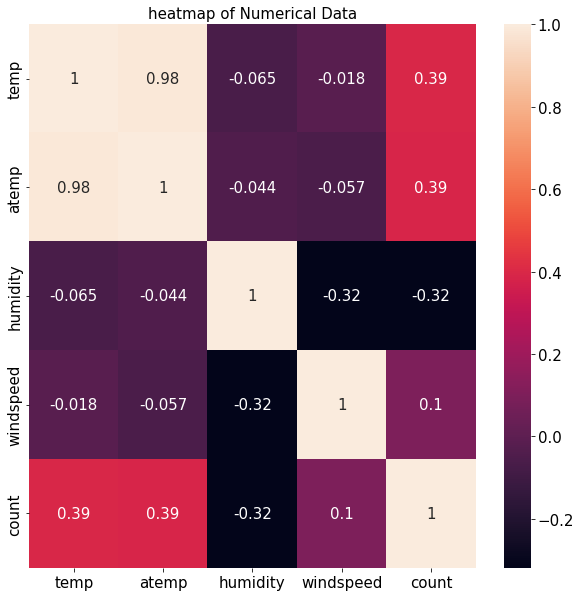

In [ ]:
fig

##모델링전략

베이스라인 모델 : 가장 기본적인 회귀모델인 LinearRegression 채택

\성능 개선  : 릿지, 라쏘, 랜덤 포레스트 회귀모델
 
 피처 엔지니어링 : 앞의 분석 수준에서 모든 모델에서 동일하게 수행
 
 하이퍼파라미터 최적화 : 그리드서치

기타 : 타깃값이 count가 아닌 log(count)임

In [95]:
# 훈련 데이터에서 weather가 4가 아닌 데이터만 추출
train = train[train['weather'] !=4]

In [96]:
#데이터 합치기
all_data_temp = pd.concat([train,test])
all_data_temp

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0000,3.0,13.0,16.0,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,8.0,32.0,40.0,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,5.0,27.0,32.0,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,3.0,10.0,13.0,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,0.0,1.0,1.0,2011-01-01,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
all_data = pd.concat([train,test], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0000,3.0,13.0,16.0,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,8.0,32.0,40.0,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,5.0,27.0,32.0,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,3.0,10.0,13.0,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,0.0,1.0,1.0,2011-01-01,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
#파생 피처(변수) 추가

from datetime import datetime

all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])

all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])

all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])

all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])

all_data['weekday'] = all_data['date'].apply(lambda dateString : 
                                             datetime.strptime(dateString,"%Y-%m-%d").weekday())

In [100]:
#필요 없는 피처 제거
drop_features = ['casual', 'registered','datetime','date','windspeed','month']

all_data = all_data.drop(drop_features, axis=1)

In [101]:
#데이터 나누기
x_train = all_data[~pd.isnull(all_data['count'])]
x_test = all_data[pd.isnull(all_data['count'])]

#타깃값 count 제거

x_train = x_train.drop(['count'], axis=1)
x_test = x_test.drop(['count'], axis=1)

y= train['count'] # 타깃값

In [102]:
x_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,day,hour,minute,second,weekday
0,Spring,0,0,Clear,9.84,14.395,81,2011,01,2011,00,00,5
1,Spring,0,0,Clear,9.02,13.635,80,2011,01,2011,00,00,5
2,Spring,0,0,Clear,9.02,13.635,80,2011,01,2011,00,00,5
3,Spring,0,0,Clear,9.84,14.395,75,2011,01,2011,00,00,5
4,Spring,0,0,Clear,9.84,14.395,75,2011,01,2011,00,00,5


In [ ]:
# # 평가지표 계산 함수 작성

# import numpy as np

# def rmsle(y_true, y_pred, convertExp=True):
#   #지수변환
#   if convertExp:
#     y_true = np.exp(y_true)
#     y_pred = np.exp(y_pred)

# #로그 변환 후 결측값 0으로 변환 
# log_true = np.nan_to_num(np.log(y_true+1))
# log_pred = np.nan_to_num(np.log(y_pred+1))

# #RMSLE 계산
# output = np.sqrt(np.mean((log_true - log_pred)**2))
# return output